In [5]:
import pandas as pd

test_data = pd.DataFrame(data={'test_group': ['a']*7015 + ['b']*6987,
                               'conversion': [1]*139 + [0]*(7015-139) + [1]*314 + [0]*(6987-314)})

# Her şeyin doğru bir şekilde oluşturulup oluşturulmadığını kontrol edelim:
test_data.groupby('test_group').describe()

conversion                                             
                count      mean       std  min  25%  50%  75%  max
test_group                                                        
a              7015.0  0.019815  0.139373  0.0  0.0  0.0  0.0  1.0
b              6987.0  0.044941  0.207189  0.0  0.0  0.0  0.0  1.0

In [7]:
test_data

,test_group,conversion
0,a,1
1,a,1
2,a,1
3,a,1
4,a,1
...,...,...
13997,b,0
13998,b,0
13999,b,0
14000,b,0


In [9]:
from scipy import stats

alpha = 0.05

statistic, pvalue = stats.ttest_ind(test_data[test_data['test_group'] == 'a']['conversion'],
                                    test_data[test_data['test_group'] == 'b']['conversion'], 
                                    alternative='less')

print(f't-statistic: {round(statistic, 2)}, p-value: {round(pvalue, 2)}')

if pvalue < alpha:
    print('The difference is statistically significant, Null Hypothesis is rejected.')
else:
    print('The difference is insignificant, Null Hypothesis cannot rejected.')

t-statistic: -8.42, p-value: 0.0
The difference is statistically significant, Null Hypothesis is rejected.


In [11]:
from scipy import stats

alpha = 0.05

observed = pd.crosstab(test_data['test_group'].values, test_data['conversion'].values)
statistic, pvalue, dof, expected_values = stats.chi2_contingency(observed)

print(f't-statistic: {round(statistic, 2)}, p-value: {round(pvalue, 2)}')

if pvalue < alpha:
    print('The difference is statistically significant, Null Hypothesis is rejected.')
else:
    print('The difference is insignificant, Null Hypothesis cannot rejected.')

t-statistic: 69.79, p-value: 0.0
The difference is statistically significant, Null Hypothesis is rejected.


In [13]:
pd.crosstab(test_data['test_group'].values, test_data['conversion'].values)

col_0,0,1
row_0,,
a,6876,139
b,6673,314


In [15]:
test_data['test_group'].values

array(['a', 'a', 'a', ..., 'b', 'b', 'b'], dtype=object)

In [17]:
test_data['conversion'].values

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [19]:
# ## Permutasyon Testi
from scipy import stats

def statistic(x, y):
    return stats.ttest_ind(x, y).statistic

alpha = 0.05
    
x = test_data[test_data['test_group'] == 'a']['conversion']
y = test_data[test_data['test_group'] == 'b']['conversion']

results = stats.permutation_test((x, y), statistic, n_resamples=100)

print(f'statistic: {round(results.statistic, 2)}, p-value: {round(results.pvalue, 2)}')

if results.pvalue < alpha:
    print('The difference is statistically significant, Null Hypothesis is rejected.')
else:
    print('The difference is insignificant, Null Hypothesis cannot rejected.')

statistic: -8.42, p-value: 0.02
The difference is statistically significant, Null Hypothesis is rejected.


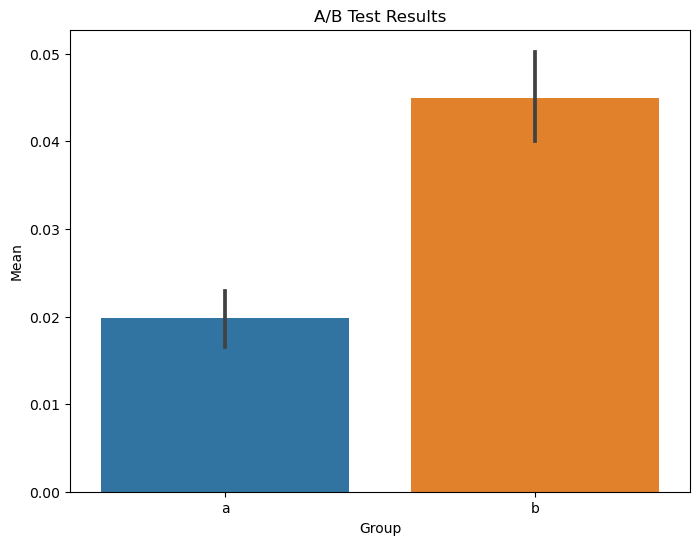

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=test_data['test_group'], 
            y=test_data['conversion'], 
            errorbar=('ci', 95)) # Confidence Intervals

plt.title('A/B Test Results')
plt.xlabel('Group')
plt.ylabel('Mean')

plt.show()

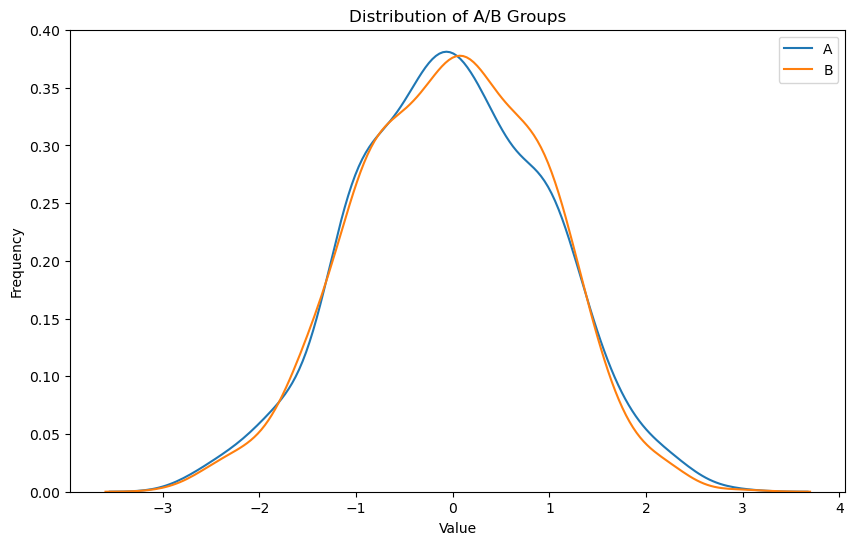

In [23]:
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.kdeplot(stats.norm.rvs(size=1000))
sns.kdeplot(stats.norm.rvs(size=1000))

plt.title('Distribution of A/B Groups')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.legend(['A', 'B'])
plt.show()

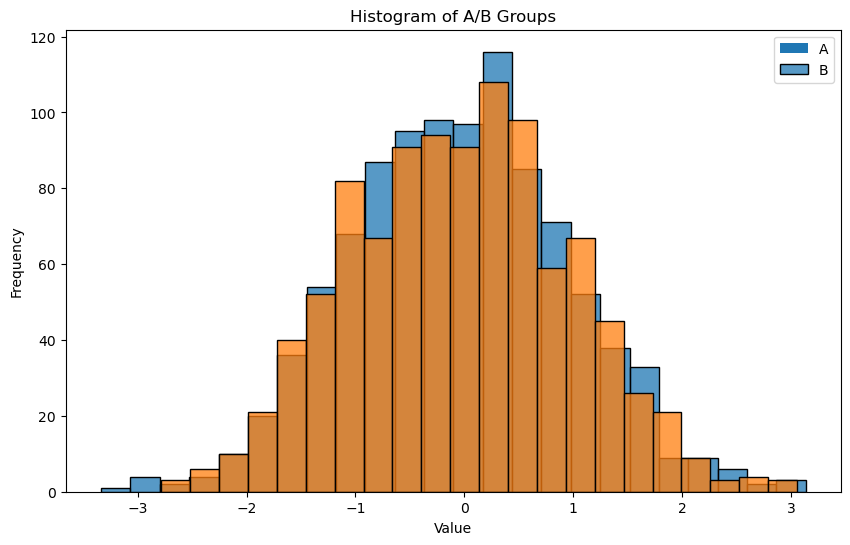

In [25]:
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.histplot(stats.norm.rvs(size=1000))
sns.histplot(stats.norm.rvs(size=1000))

plt.title('Histogram of A/B Groups')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.legend(['A', 'B'])
plt.show()

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Verileri karıştırıyoruz çünkü şu anki sıralama dönüşüm değerine göre yapılmış durumda
# Gerçek verileri kullanmış olsaydık, burada tarih ve saat sıralaması yapılması gerekirdi
test_data = test_data.sample(frac=1).reset_index(drop=True)

In [31]:
# Kümülatif ortalamayı hesaplıyoruz - bu, zamanla dönüşüm değişimini gösterir
cumulative_metric_a = test_data[test_data['test_group'] == 'a']['conversion'].expanding().mean().reset_index(drop=True)
cumulative_metric_b = test_data[test_data['test_group'] == 'b']['conversion'].expanding().mean().reset_index(drop=True)

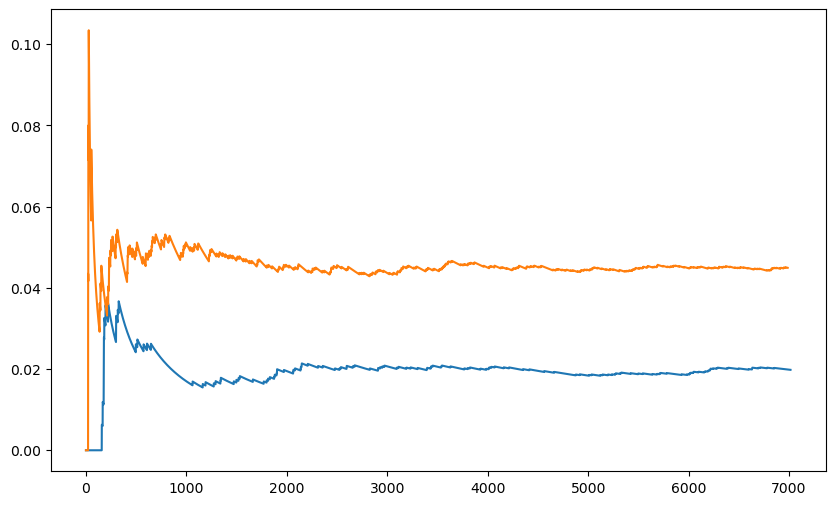

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(cumulative_metric_a, label='A')
plt.plot(cumulative_metric_b, label='B')
